# Comparison Between Methods

We compare here the results obtained for the unperturbed Green's function in the MTI.
In the following, we refer to:

- i. *exact* solution, meaning the Green's function obtained by solving the system of coupled differential equations;

- ii. *approximated* solution, referring to the numerical solution obtained as a sum of wavefunctions and eigenenergies computed discretizing the MTI Hamiltonian on a finite lattice along $z$.


In [118]:
import nbimporter
import numpy as np

from Greens_Functions import GFexact
from Greens_Functions import GFapprox, eigenstates

# Hamiltonian parameters
params=dict(C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6)

# lattice
Nlat = 250; d = 100.; dZ = d/(Nlat-1)
# discretized eigenstates
lattice, egval, spinors = eigenstates(Nlat=Nlat, dZ=dZ, kx=0., ky=0., L=0., Neig=500)

### **Exact Solution**

In [119]:
# compute exact Green's function on the lattice
gfexact = np.array([GFexact(d=d, z=z, Z=z, kx=0., ky=0., L=0., w=0.01) for z in lattice])

### **Approximate Solution**

In [120]:
# number of states for loop 
Nstates = np.arange(100,501,100)
# compute approximate Green's function with all states
gfapprox = np.array([[ GFapprox(Nstates=n, z=z, Z=z, kx=0., ky=0., L=0., w=0.01, egval=egval, spinors=spinors) for z in range(Nlat)] for n in Nstates])

#### <font color='green'> **Real Part** </font> 

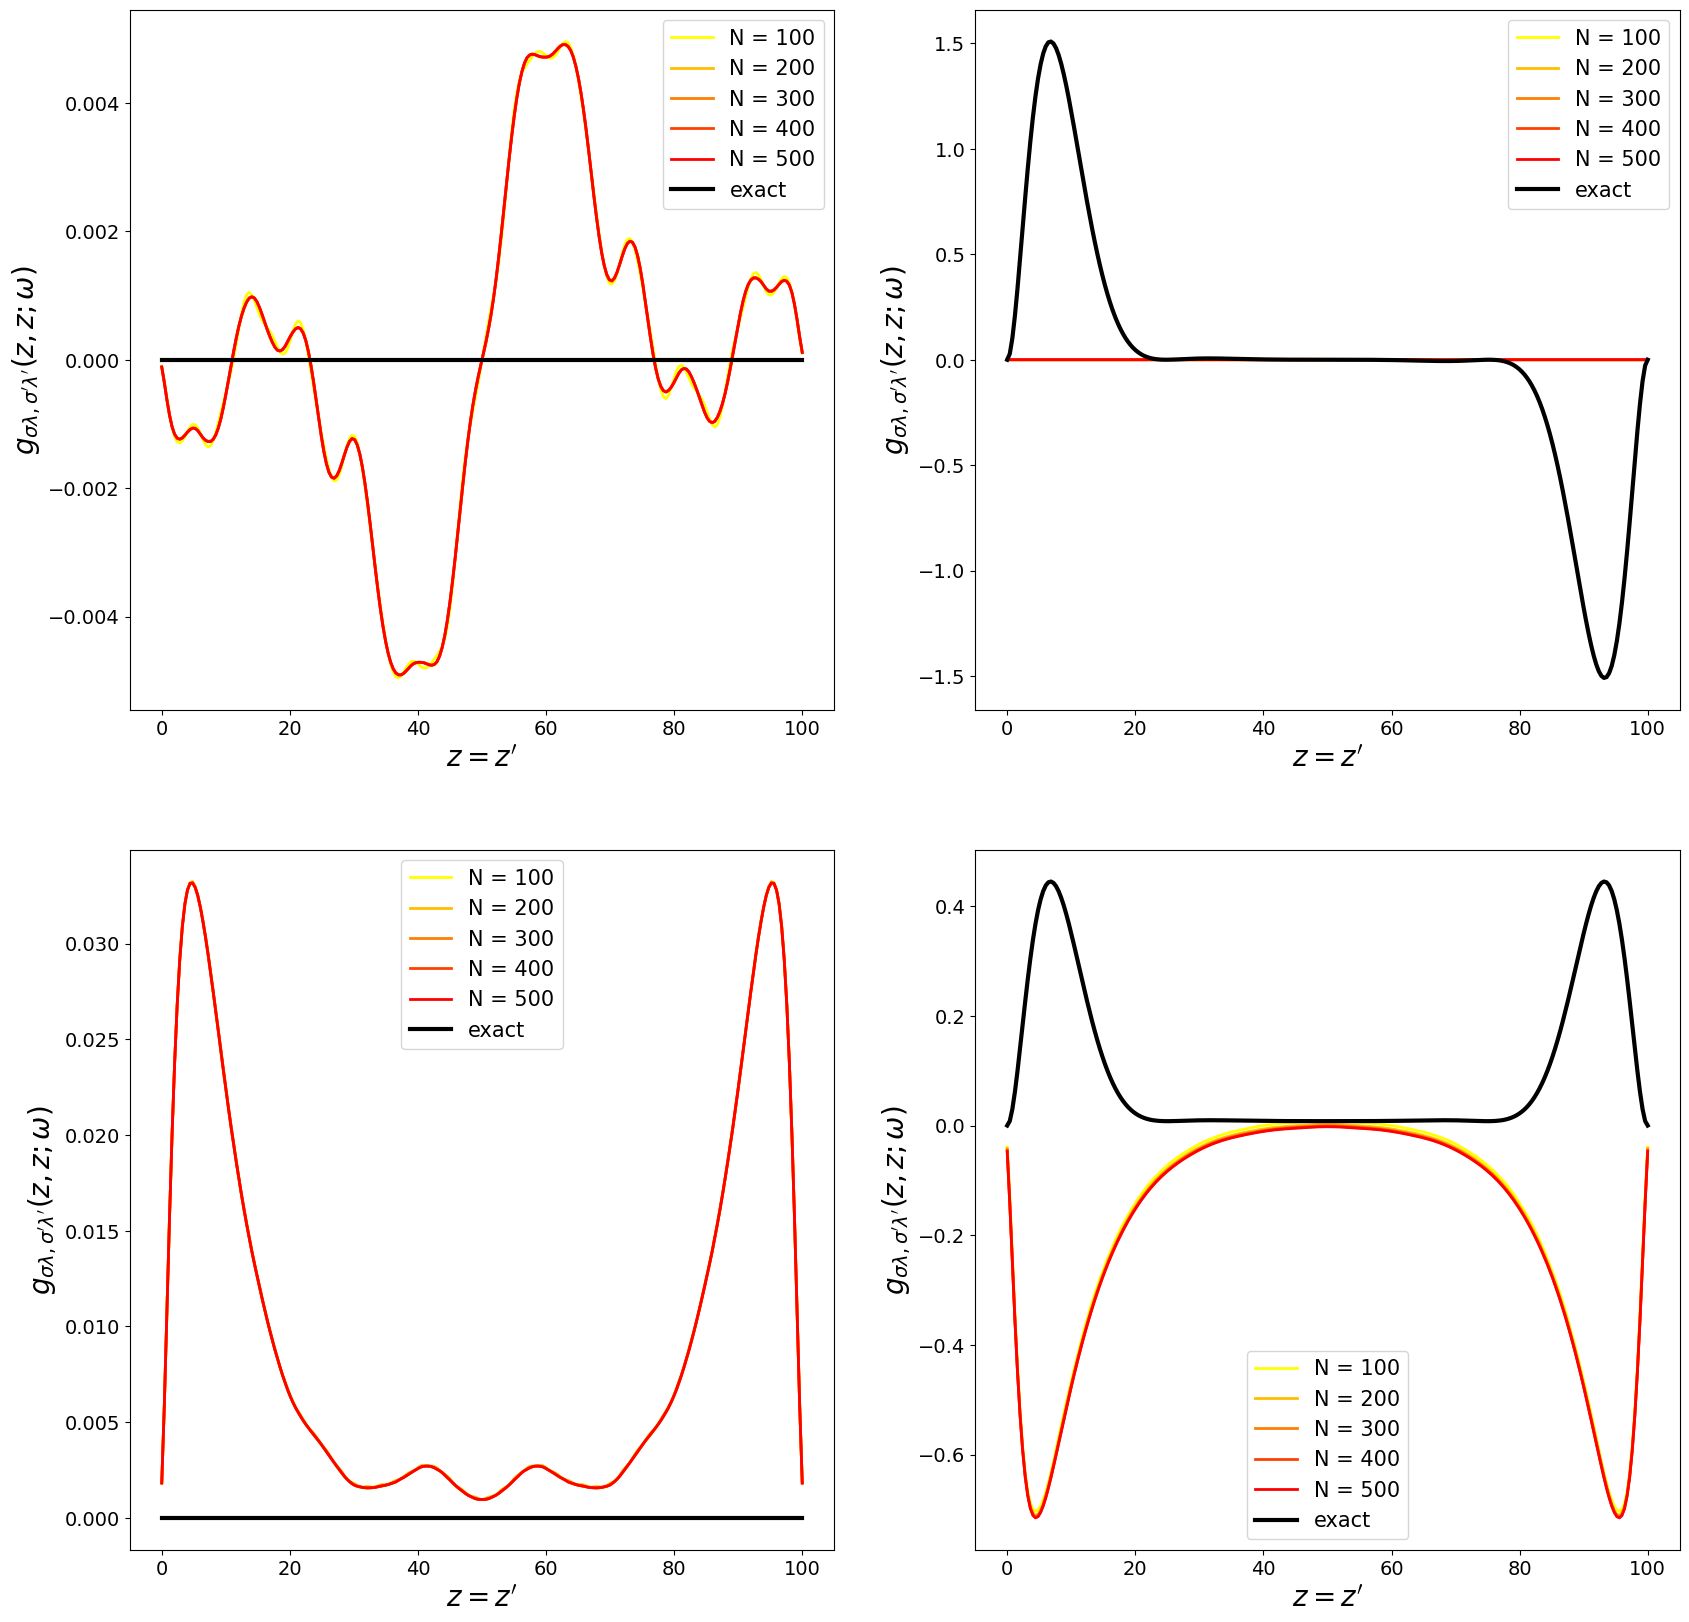

In [125]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# colors gradient
cmap = plt.get_cmap('autumn_r', len(Nstates))

# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# index for column
icol = 3
for irow in range(4):
    
    # indices for plotting
    if irow==0: iPic = 0; jPic = 0
    if irow==1: iPic = 0; jPic = 1
    if irow==2: iPic = 1; jPic = 0
    if irow==3: iPic = 1; jPic = 1

    for istates in range(len(Nstates)):
        # plot approximate results
        axs[iPic][jPic].plot(lattice, [gfapprox[istates][idx][irow][icol].real for idx in range(Nlat)], c=cmap(istates), lw=2, label='N = ' + str(Nstates[istates]) )
        
    # plot exact result
    axs[iPic][jPic].plot(lattice, [gfexact[idx][irow][icol].real for idx in range(Nlat)], c='black', lw=3, label='exact')

    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14);      
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

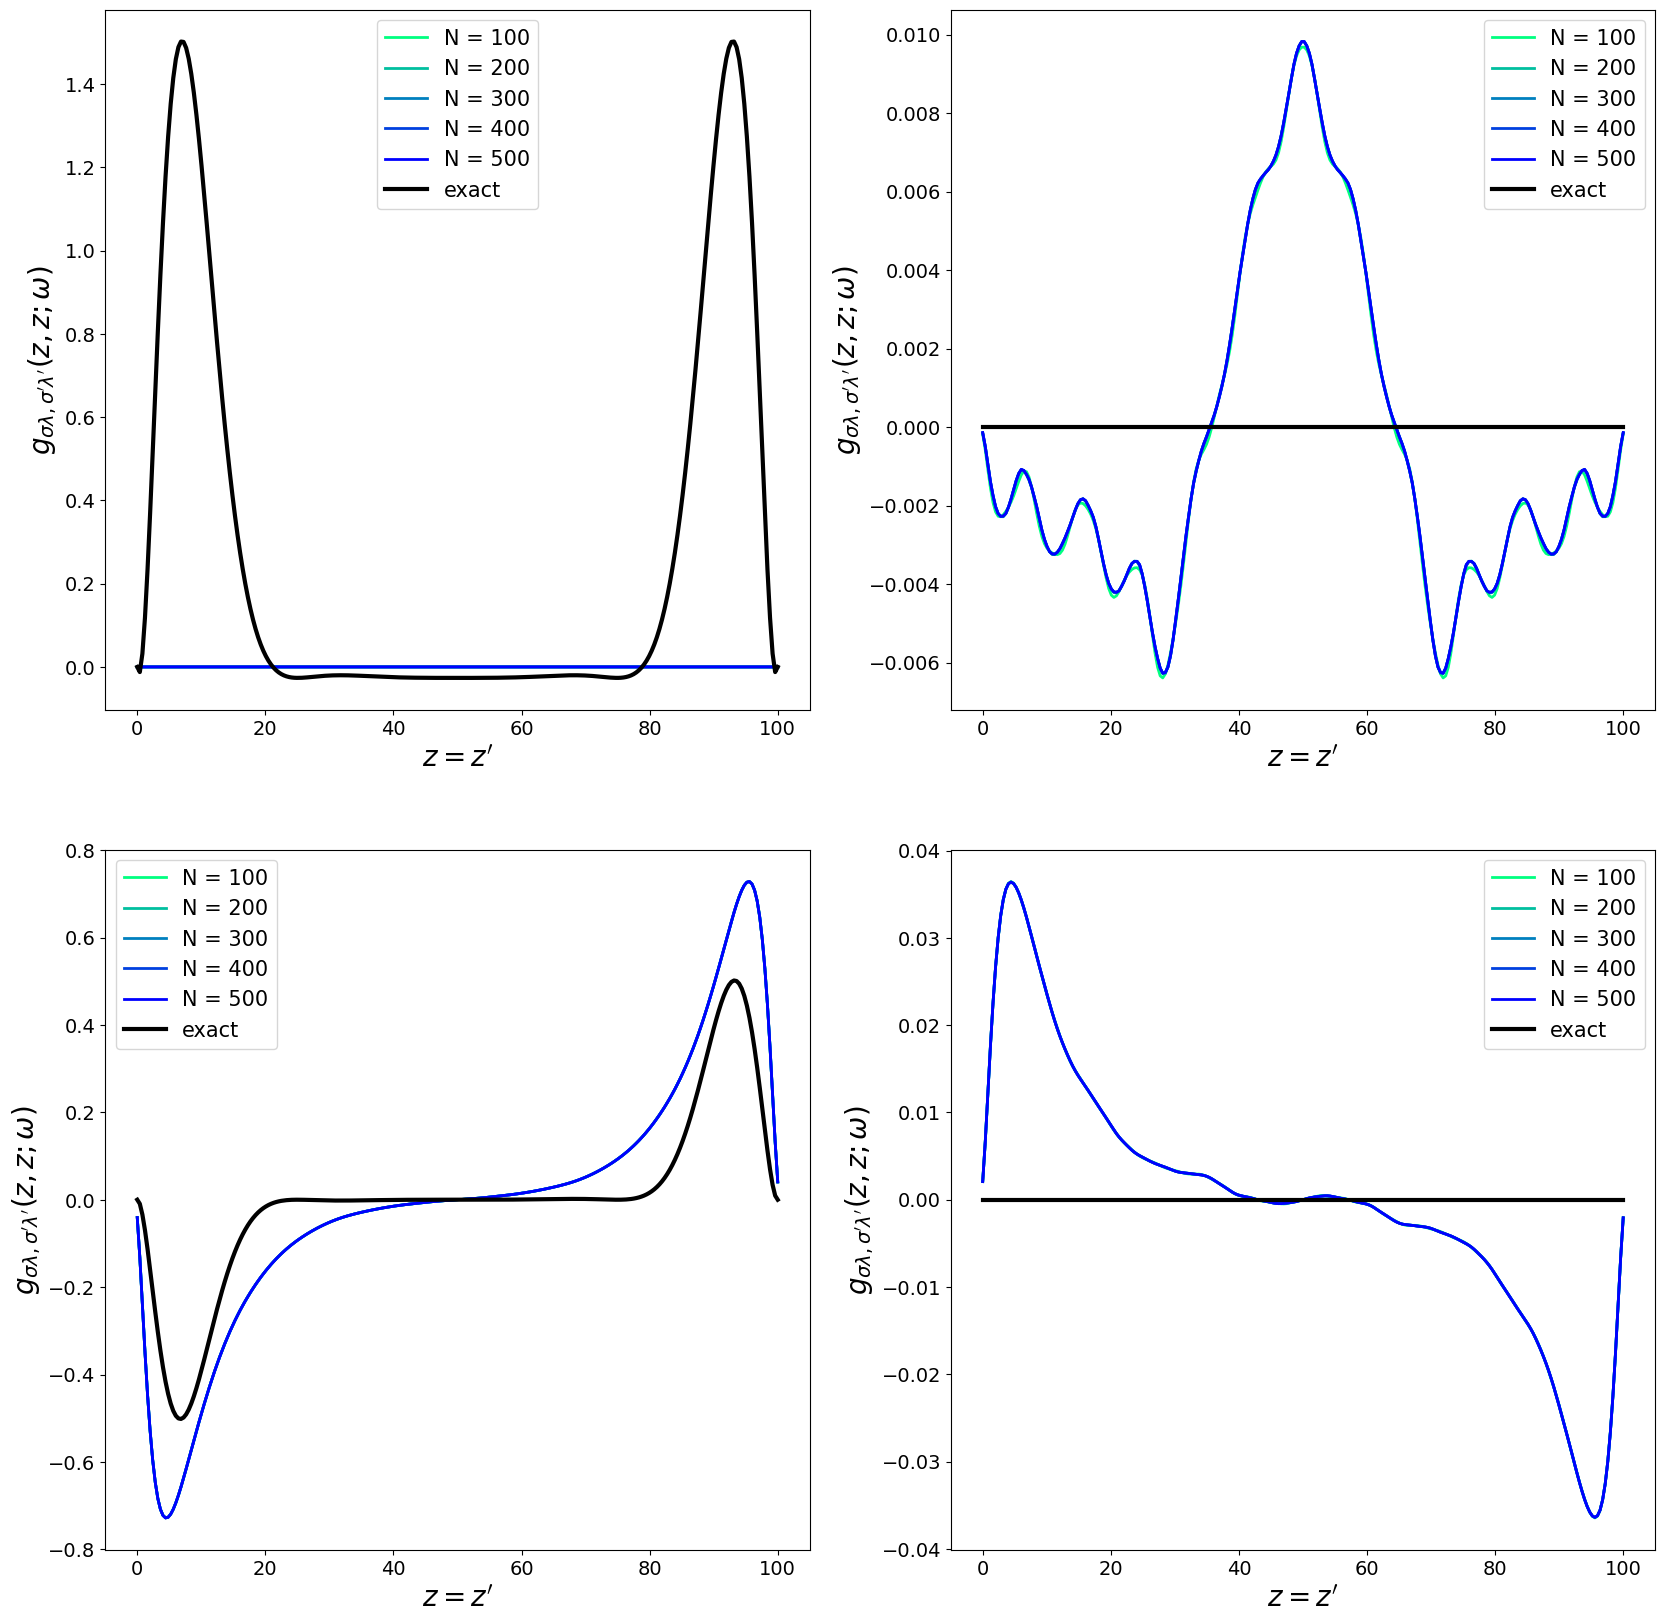

In [127]:
# colors gradient
cmap = plt.get_cmap('winter_r', len(Nstates))

# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# index for column
icol = 0
for irow in range(4):
    
    # indices for plotting
    if irow==0: iPic = 0; jPic = 0
    if irow==1: iPic = 0; jPic = 1
    if irow==2: iPic = 1; jPic = 0
    if irow==3: iPic = 1; jPic = 1

    for istates in range(len(Nstates)):
        # plot approximate results
        axs[iPic][jPic].plot(lattice, [gfapprox[istates][idx][irow][icol].imag for idx in range(Nlat)], c=cmap(istates), lw=2, label='N = ' + str(Nstates[istates]) )
        
    # plot exact result
    axs[iPic][jPic].plot(lattice, [gfexact[idx][irow][icol].imag for idx in range(Nlat)], c='black', lw=3, label='exact')

    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14);      
    axs[iPic][jPic].legend(fontsize=15);